# Análisis exploratorio de Datos

### Proyecto: Qué factores afectan la tasa de propinas.

Conjunto de datos Tips: http://vincentarelbundock.github.io/Rdatasets/csv/reshape2/tips.csv

Descripción: http://vincentarelbundock.github.io/Rdatasets/doc/reshape2/tips.html

### Descripción del problema

Para nuestro proyecto, decidimos llevar a cabo un análisis para
determinar qué factores afectan la tasa de propinas en un
restaurante. 

El valor de la propina que un cliente de un restaurante decide dar
depende de numerosos factores, como la cantidad total de la factura,
el sexo del cliente, tabaquismo, el día de la semana, la hora del 
día, y el tamaño del grupo de clientes. 

En nuestro estudio, 
se optó por utilizar dos variables independientes y una variable 
dependiente. 

La variable dependiente es la propina, 
mientras que las variables independientes son factura total y el día 
de la semana. 

Hay cuatro niveles en la variable "día de la semana": 
Jueves, Viernes, Sábado y Domingo.

Uno de nuestros objetivos para completar este proyecto es estudiar y 
analizar qué día de la semana obtiene la mayor y menor cantidad de 
propinas. 

En segundo lugar, 
queremos descubrir si la cantidad de la propina aumenta a medida que 
aumenta el total de la factura del cliente. 
En otras palabras, 
estamos probando a ver si existe una asociación lineal positiva entre 
la propina y la factura total. 

Este estudio se lleva a cabo porque queremos que los empleados que 
trabajan en la industria de hostelería estén al tanto de qué día 
conduce a la mayor cantidad de propinas para que conozcan el 
potencial, 
de ganar dinero adicional en términos de propinas. 

Además, 
queremos que los empleados sean conscientes de que tipos de clientes 
son los que dejan más o menos propinas en función de su factura total.

### Descripción de los datos

El conjunto de datos propinas que estamos utilizando para este 
proyecto fue creado por un camarero que registró la información 
sobre cada propina que recibió durante un período de unos meses de
trabajo en un restaurante. 

Estos datos fueron obtenidos en 1995. El camarero probablemente 
recopiló los datos porque sentía curiosidad por ver qué factores 
jugaron el papel más importante en la conformación de la cantidad de 
propinas que estaba ganando. 

Hay 244 observaciones y 7 variables en el conjunto de datos. 
Las 7 variables son: 
- propina en dólares, 
- la cuenta total en dólares, 
- el sexo de quien pagó la factura, 
- si había fumadores en la grupo, 
- días de la semana, 
- hora del día, 
- y el tamaño del grupo.

De las siete variables, tres son numéricas, mientras que cuatro 
son categóricas. 
Las variables numéricas incluyen factura total, 
la propina y el tamaño del grupo. 
Las variables categóricas incluyen el sexo del pagador factura, fumador/no fumador, el día de la semana, y la hora del día. 
Cada una de las variables categóricas tiene múltiples niveles. 
El sexo tiene dos niveles (masculino y femenino), 
el estado de fumador tiene dos niveles (Sí y No), 
día de la semana tiene cuatro niveles (Jueves, Viernes, Sábado, 
Domingo), 
y la hora del día tiene dos niveles (almuerzo y cena).

Los problemas particulares que puedan surgir durante la recolección 
de datos incluyen factores que sesgan los datos. 
Esto incluye días festivos, cumpleaños, bodas, grandes ocasiones, 
y el tipo de restaurante (mariscos, comida rápida). 
Las grandes ocasiones enumeradas anteriormente conducirían a mayores facturas y propinas superiores. 

Otras cuestiones externas que puedan surgir durante la recolección 
de datos incluyen mal servicio al cliente y cualquier sesgo debido 
al sexo del pagador de la factura, el tamaño del grupo, 
y el hábito de fumar.

### Análisis propuesto

**Reestructuración de los datos**

1. Enfoque: Encuentre la proporción diaria de propinas usando
$$\text{Proporción propinas}= 
\frac{\text{Propinas por día}}{\text{Propinas totales}}$$ 

2. Encuentre el porcentaje diario de de propinas usando
$$\text{Proporción propinas}= 
\frac{\text{Propinas por día}}{\text{Propinas totales}}	\times 100$$ 

3. Preguntas abordadas:
    1. En que día se gana más propinas.
    2. Qué día se gana menos propinas.

**Resumen estadístico**

1. Enfoque: Calcule el promedio y la desviación estándar y el resumen de 5 números del total de la factura y el total de la propina.

2. Dibuje un histograma, boxplot y gráfico de densidad para las variables del punto 1. Analice la distribución de estas variables.

3. Preguntas abordadas:
    1. Día con propinas mas bajas.
    2. Día como propinas más altas.
    3. IQR - $Xth$\% de la muestra paga en promedio $Y$ propinas
    4. Min. Max. para cada día.


**Diagrama de dispersión**

1. Enfoque: Dibuje un diagrama de dispersión
representando las variables 
Factura Total $\times$ Propina.

2. Razón: ver como la factura total y las propinas están relacionadas.

3. Preguntas abordadas:
    1. ¿Están los clientes dispuestos a pagar más propina, si la factura es más alta?
    2. ¿Si incrementa la factura, incrementa la propina?
    3. ¿Tendencia incremental?
    

## Análisis exploratorio en Python

- Para nuestro análisis usaremos seaborn y pandas.

- Python es uno de los lenguajes fundamentales para el análsis de datos. 
- Es importante ganar habilidades en Python en general y en particular en las librerías para análisis de datos. 
- **No se preocupe si no entiende completamente la sintaxis a la primera.**
  - A medida que acumule horas de práctica irá mejorando su comprensión. 
  - De momento replique el código abajo para otras variables. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

- Ordenamos la variables categóricas, nosotros sabemos el orden de los días de la semana, Pandas no necesariamente.
  - Sintaxis para ordenar:
```Python
  data[variable] = pd.Categorical(data[variable], categories, ordered=True)
```
  - Variable a ordenar: **data[variable]**
  - Categorías ordenadas de la variable: **categories**
  - Opción:  **ordered=True**
  
- Seleccionamos la variable de interes, **day**, y ordenamos de acuerdo a los días de la semana:
```Python
tip_data['day'] = pd.Categorical(tip_data['day'],
                                   categories=['Thur', 'Fri', 'Sat', 'Sun'],
                                   ordered=True)
```

In [2]:
# Cargar los datos desde un repositorio en github
tip_data = pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/reshape2/tips.csv", index_col=0)

# Asignaremos un orden a las variables categóricas

# Ordenamos los días
tip_data['day'] = pd.Categorical(tip_data['day'],
                                   categories=['Thur', 'Fri', 'Sat', 'Sun'],
                                   ordered=True)

# Ordenamos el tiempo de servicio
tip_data['time'] = pd.Categorical(tip_data['time'],
                                   categories=['Lunch', 'Dinner'],
                                   ordered=True)

# Fumadores
tip_data['smoker'] = pd.Categorical(tip_data['smoker'],
                                   categories=['Yes', 'No'],
                                   ordered=True)

tip_data.head()  # muestra los primeros 6 valores en el dataframe

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


- Podemos describir los datos agrupando por una variable de interés

```Python  
data.groupby(variable).describe()
```

- Podemos describir los datos agrupando por la variable sex
  - Compruebe la diferencia entre usar o no 
```Python  
.transpose()
```

In [3]:
tip_data.groupby('sex').describe().transpose()

sex                  Female        Male
total_bill count  87.000000  157.000000
           mean   18.056897   20.744076
           std     8.009209    9.246469
           min     3.070000    7.250000
           25%    12.750000   14.000000
           50%    16.400000   18.350000
           75%    21.520000   24.710000
           max    44.300000   50.810000
tip        count  87.000000  157.000000
           mean    2.833448    3.089618
           std     1.159495    1.489102
           min     1.000000    1.000000
           25%     2.000000    2.000000
           50%     2.750000    3.000000
           75%     3.500000    3.760000
           max     6.500000   10.000000
size       count  87.000000  157.000000
           mean    2.459770    2.630573
           std     0.937644    0.955997
           min     1.000000    1.000000
           25%     2.000000    2.000000
           50%     2.000000    2.000000
           75%     3.000000    3.000000
           max     6.000000    6.000000

- Podemos describir los datos agrupando por la variable smoker

In [4]:
tip_data.groupby('smoker').describe().transpose()

smoker                  Yes          No
total_bill count  93.000000  151.000000
           mean   20.756344   19.188278
           std     9.832154    8.255582
           min     3.070000    7.250000
           25%    13.420000   13.325000
           50%    17.920000   17.590000
           75%    26.860000   22.755000
           max    50.810000   48.330000
tip        count  93.000000  151.000000
           mean    3.008710    2.991854
           std     1.401468    1.377190
           min     1.000000    1.000000
           25%     2.000000    2.000000
           50%     3.000000    2.740000
           75%     3.680000    3.505000
           max    10.000000    9.000000
size       count  93.000000  151.000000
           mean    2.408602    2.668874
           std     0.810751    1.017984
           min     1.000000    1.000000
           25%     2.000000    2.000000
           50%     2.000000    2.000000
           75%     3.000000    3.000000
           max     5.000000    6.000000

- Podemos describir los datos agrupando por más de una variable:
  - En este caso sex y smoker

In [5]:
tip_data.groupby(['sex', 'smoker']).describe().transpose()

sex                  Female                  Male           
smoker                  Yes         No        Yes         No
total_bill count  33.000000  54.000000  60.000000  97.000000
           mean   17.977879  18.105185  22.284500  19.791237
           std     9.189751   7.286455   9.911845   8.726566
           min     3.070000   7.250000   7.250000   7.510000
           25%    12.760000  12.650000  15.272500  13.810000
           50%    16.270000  16.690000  20.390000  18.240000
           75%    22.120000  20.862500  28.572500  22.820000
           max    44.300000  35.830000  50.810000  48.330000
tip        count  33.000000  54.000000  60.000000  97.000000
           mean    2.931515   2.773519   3.051167   3.113402
           std     1.219916   1.128425   1.500120   1.489559
           min     1.000000   1.000000   1.000000   1.250000
           25%     2.000000   2.000000   2.000000   2.000000
           50%     2.880000   2.680000   3.000000   2.740000
           75%     3.500000   3.437500   3.820000   3.710000
           max     6.500000   5.200000  10.000000   9.000000
size       count  33.000000  54.000000  60.000000  97.000000
           mean    2.242424   2.592593   2.500000   2.711340
           std     0.613917   1.073146   0.892530   0.989094
           min     1.000000   1.000000   1.000000   2.000000
           25%     2.000000   2.000000   2.000000   2.000000
           50%     2.000000   2.000000   2.000000   2.000000
           75%     2.000000   3.000000   3.000000   3.000000
           max     4.000000   6.000000   5.000000   6.000000

In [6]:
tip_data.groupby('day').describe().transpose()

day                    Thur        Fri        Sat        Sun
total_bill count  62.000000  19.000000  87.000000  76.000000
           mean   17.682742  17.151579  20.441379  21.410000
           std     7.886170   8.302660   9.480419   8.832122
           min     7.510000   5.750000   3.070000   7.250000
           25%    12.442500  12.095000  13.905000  14.987500
           50%    16.200000  15.380000  18.240000  19.630000
           75%    20.155000  21.750000  24.740000  25.597500
           max    43.110000  40.170000  50.810000  48.170000
tip        count  62.000000  19.000000  87.000000  76.000000
           mean    2.771452   2.734737   2.993103   3.255132
           std     1.240223   1.019577   1.631014   1.234880
           min     1.250000   1.000000   1.000000   1.010000
           25%     2.000000   1.960000   2.000000   2.037500
           50%     2.305000   3.000000   2.750000   3.150000
           75%     3.362500   3.365000   3.370000   4.000000
           max     6.700000   4.730000  10.000000   6.500000
size       count  62.000000  19.000000  87.000000  76.000000
           mean    2.451613   2.105263   2.517241   2.842105
           std     1.066285   0.567131   0.819275   1.007341
           min     1.000000   1.000000   1.000000   2.000000
           25%     2.000000   2.000000   2.000000   2.000000
           50%     2.000000   2.000000   2.000000   2.000000
           75%     2.000000   2.000000   3.000000   4.000000
           max     6.000000   4.000000   5.000000   6.000000

### Analicemos que ocurre con las propinas (tip) respecto al género (sex)

In [7]:
tip_data.groupby('sex').describe().transpose()

sex                  Female        Male
total_bill count  87.000000  157.000000
           mean   18.056897   20.744076
           std     8.009209    9.246469
           min     3.070000    7.250000
           25%    12.750000   14.000000
           50%    16.400000   18.350000
           75%    21.520000   24.710000
           max    44.300000   50.810000
tip        count  87.000000  157.000000
           mean    2.833448    3.089618
           std     1.159495    1.489102
           min     1.000000    1.000000
           25%     2.000000    2.000000
           50%     2.750000    3.000000
           75%     3.500000    3.760000
           max     6.500000   10.000000
size       count  87.000000  157.000000
           mean    2.459770    2.630573
           std     0.937644    0.955997
           min     1.000000    1.000000
           25%     2.000000    2.000000
           50%     2.000000    2.000000
           75%     3.000000    3.000000
           max     6.000000    6.000000

- En el dataset hay menos mujeres (87) que hombres (157) registrados en el pago de la cuenta.

- Seaborn es una de las librerías importantes para realizar analítica visual de datos en Python

- De manera general la sintaxis es la siguiente:
```Python
sns.type_of_graph(data, options)
```

- Por ejemplo aquí especificamos: 
  - data como **tip_data** (nuestro dataframe)
  - x="sex", la variable **sex** será analizada como nuestra $x$.
  
```Python
sns.countplot(data=tip_data, x='sex')
```

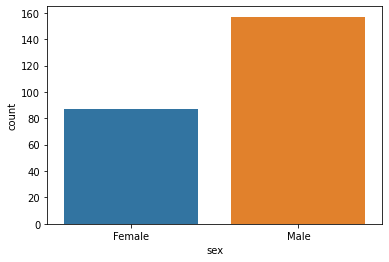

In [8]:
sns.countplot(data=tip_data, x='sex')

- Podemos observar en los diagramas de caja que los hombres parecen dejar más propina que las mujeres.
  - Note los valores atípicos (outliers): algunas propinas son muy generosas de parte de los hombres. 

- Para nuestro diagrama de caja, especificamos, nuestros datos y las variables $x$ y $y$ a usar.

```Python
sns.boxplot(data=tip_data, x="sex", y="tip")
```
  - Intercambie las variables y vea el resultado:

```Python
sns.boxplot(data=tip_data, x="tip", y="sex")
```

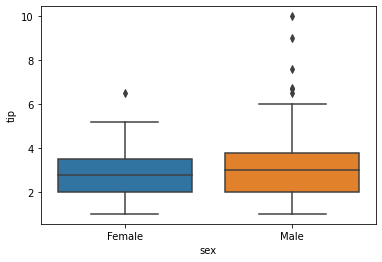

In [9]:
sns.boxplot(data=tip_data, x="sex", y="tip")

- Vamos a analizar la información presentada en los diagramas de caja usando un gráfico de barras de error.
  - Vemos las medias para Female: 2.833448, Male: 3.089618.
  - Las barras de error (líneas vérticales, **err_style = "bars"**) representan un intervalo de confianza (del 68%) alrededor de la media:
```Python
ci=68, estimator='mean'
```

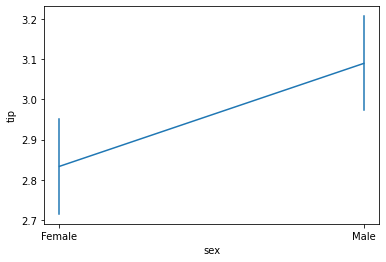

In [10]:
sns.lineplot(data=tip_data, x="sex", y="tip", err_style="bars", ci=68, estimator='mean')

- En los gráficos de densidad, la separabilidad (curvas) para el género es difícil de observar, las curvas se solapan.
  - Sin embargo la cola derecha para Male es más pesada que que para Female, debido los valores atípicos. 

- Podemos especificar una variable **hue** para algunos gráficos. 
  - Al especificar **hue** se construirá el gráfico agrupando de acuerdo a esta. 
  - El codigo abajo construye un diagrama de densidad para la variable **x='tip'** agrupando por la variable **hue='sex'**
```Python  
sns.displot(data=tip_data, x="tip", hue="sex", common_norm=False, kind="kde", rug=True)
```
- El parámetro **kind="kde"** indica que queremos un gráfico de densidad (kernel density estimate).
  - El área bajo las curvas es 1.
- El parámetro **common_norm=False**, indica que cada curva de forma separada debe integrar a 1. 
  - Si es falso, al tener un análisis agrupado por hue, la suma de ambas curvas será de 1. 
- El parámetro **rug=True** muestra las observaciones individuales como lineas verticales en la base de las curvas.
  - Cambie a False y vea el resultado.

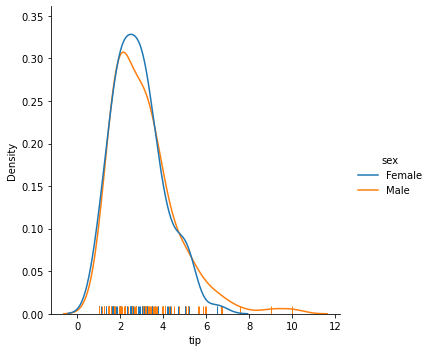

In [11]:
sns.displot(data=tip_data, x="tip", hue="sex", common_norm=False, kind="kde", rug=True)

- Cuando la cuenta la paga un hombre los grupos son mayores. 
  - Si normalizamos la propina por número de personas, ¿seguimos observando diferencias?

- Vamos a realizar el análisis.
  - Primero creamos la variable (columna) **tip_by_person**, dividiendo la propina entre el tamaño del grupo.

```Python
tip_data['tip_by_person'] = tip_data.tip / tip_data.size
```

In [12]:
tip_data['tip_by_person'] = tip_data.tip / tip_data.size

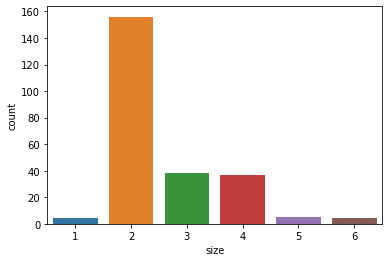

In [13]:
sns.countplot(data=tip_data, x="size")

- Podemos especificar una variable **hue** para algunos gráficos. 
  - Al especificar **hue** se construirá el gráfico agrupando de acuerdo a esta. 
  - El codigo abajo construye un diagrama de barras para las variables **x='size'** y **y='tip_by_person'** agrupando por la variable **hue='sex'**
```Python  
sns.barplot(data=tip_data, x="size", y="tip_by_person", hue="sex")
```

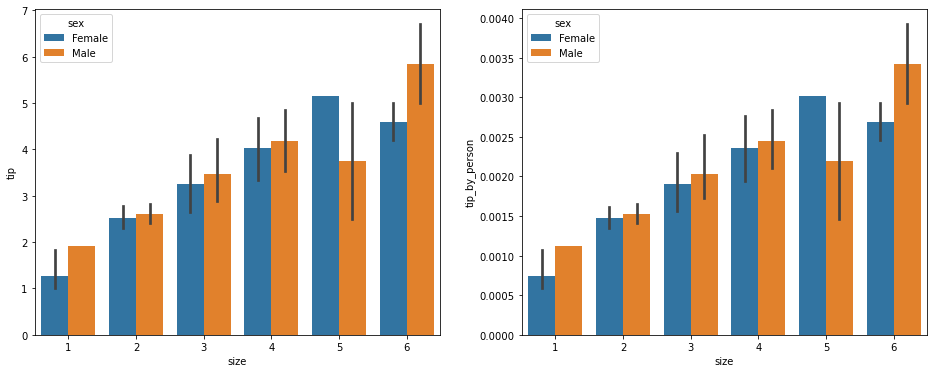

In [14]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.barplot(data=tip_data, x="size", y="tip", hue="sex")
plt.subplot(1,2,2)
sns.barplot(data=tip_data, x="size", y="tip_by_person", hue="sex")

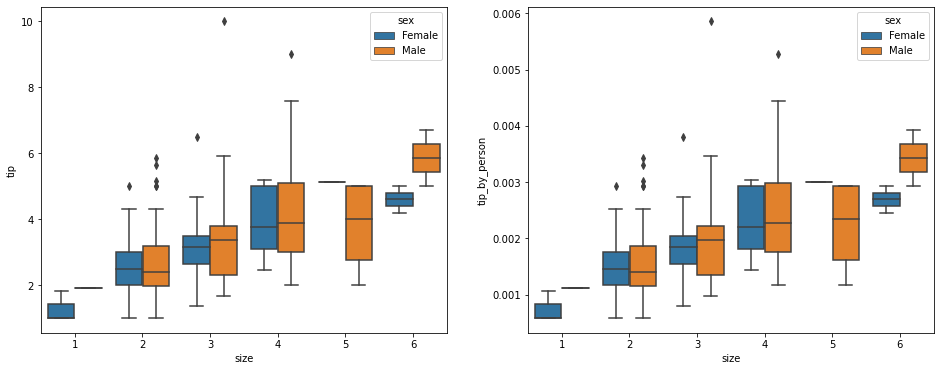

In [15]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.boxplot(data=tip_data, x="size", y="tip", hue="sex")
plt.subplot(1,2,2)
sns.boxplot(data=tip_data, x="size", y="tip_by_person", hue="sex")

- Note que podemos usar variables adiciones en los parámetros del gráfico, vea **style**:

```Python
sns.lineplot(data=tip_data, x="size", y="tip", hue="sex", style='sex', ci=68)
```
  - Al difinir **style='sex'**, define el estilo de línea, sólida y punteada, de acuerdo a la variable **sex**.

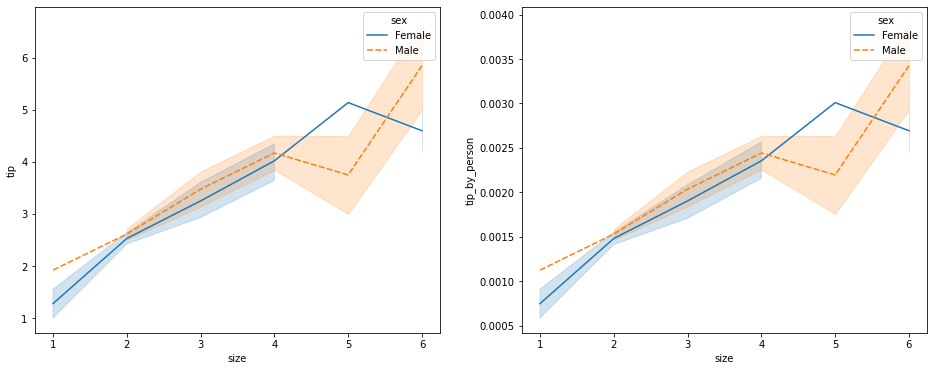

In [16]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.lineplot(data=tip_data, x="size", y="tip", hue="sex", style='sex', ci=68)

plt.subplot(1,2,2)
sns.lineplot(data=tip_data, x="size", y="tip_by_person", hue="sex", style='sex', ci=68)

- Claramente notamos que las propinas suben de acuerdo al número de personas. 
  - Es decir entre más grande el grupo, mayor la propina. 
- Pero la propina no sube de menra proporcional por persona. 
  - De hecho la propina por persona, baja a medida que el tamaño de grupo se incrementa. 
  
**Transformar nuestras variables** puede ayudarnos a hacer un mejor análsis. 

In [17]:
tip_data.groupby('sex').tip_by_person.describe().transpose()

sex,Female,Male
count,87.000000,157.000000
mean,0.001659,0.001809
std,0.000679,0.000872
min,0.000585,0.000585
25%,0.001171,0.001171
50%,0.001610,0.001756
75%,0.002049,0.002201
max,0.003806,0.005855


- En este caso la media por género es muy similar. 
- La mediana ahora es mayor para Mujeres (Female) Q2 (50%) = 1.115 que para Hombres, 1.085.
  - Antes la mediana era mayor para hombres. 
  - La media aún se ve influenciada por los outliers presentes. 

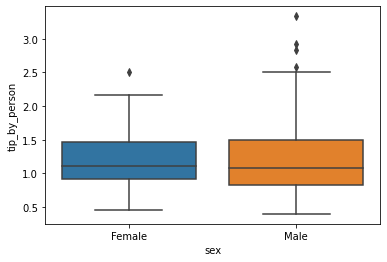

In [18]:
tip_data['tip_by_person'] = tip_data['tip'] / tip_data['size']

sns.boxplot(data=tip_data, x="sex", y="tip_by_person")

- La diferencia de medias de acuerdo al género es menor para la propina por personas.

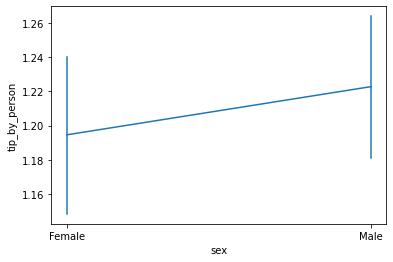

In [19]:
sns.lineplot(data=tip_data, x="sex", y="tip_by_person", err_style="bars", ci=68, estimator='mean')

- La cola derecha es menor en este caso para los hombres (Male).

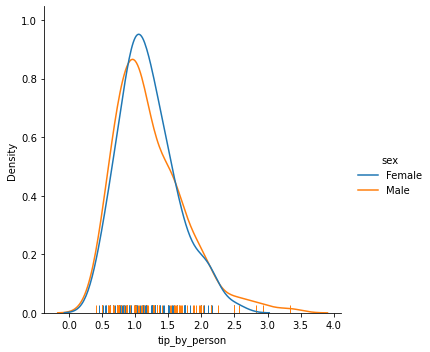

In [20]:
sns.displot(data=tip_data, x="tip_by_person", hue="sex", common_norm=False, kind="kde", rug=True)

<img align="left" width="60px" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/homework.png">

<br/><br/><br/>

**Tarea:**
- Note que la mayoría de los grupos son de 2 personas. 
  - Haga un análsis para parejas, en qué momento del día suelen ir al restaurante. 
  - Quién paga (Hombre / mujer).
  - Valor de la propina con respecto a quién paga.

### Podemos realizar un análisis con respecto a los días de la semana y si es fumador

- Analice la sintaxis y note la diferencia con el análisis arriba. 
- Interprete los resultados.

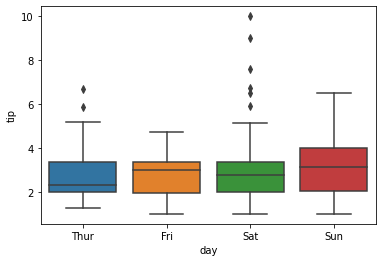

In [21]:
sns.boxplot(x="day", y="tip", data=tip_data)

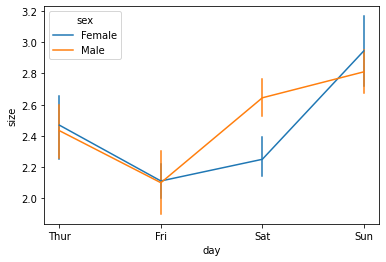

In [22]:
sns.lineplot(data=tip_data, x="day", y="size", hue="sex", 
             err_style="bars", ci=68, estimator='mean')

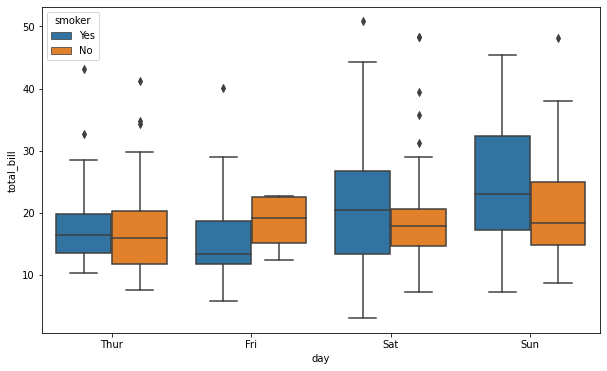

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tip_data, order=["Thur", "Fri", "Sat", "Sun"])

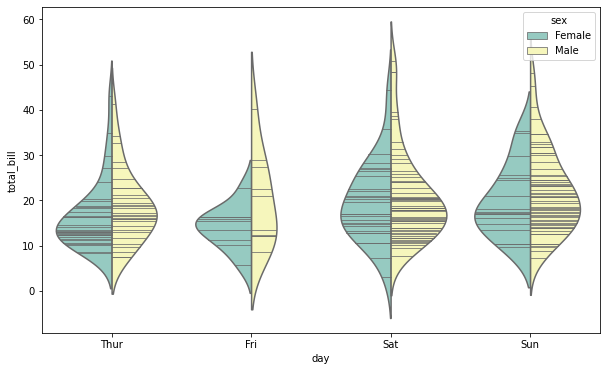

In [24]:
plt.figure(figsize=(10,6))
sns.violinplot(x="day", y="total_bill", hue="sex", data=tip_data,
               split=True, inner="stick", palette="Set3", 
               order=["Thur", "Fri", "Sat", "Sun"])

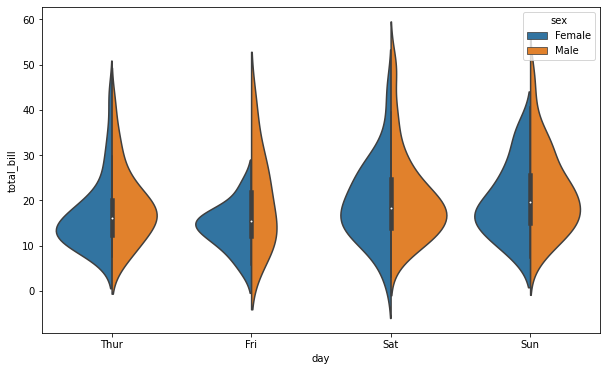

In [25]:
plt.figure(figsize=(10,6))
sns.violinplot(x="day", y="total_bill", hue="sex", data=tip_data, 
               split=True, order=["Thur", "Fri", "Sat", "Sun"])

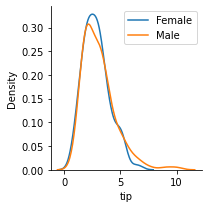

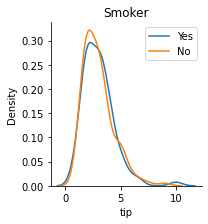

In [26]:
g = sns.FacetGrid(tip_data, hue="sex")
g = g.map(sns.kdeplot, "tip")
plt.legend()
plt.show()

g = sns.FacetGrid(tip_data, hue="smoker")
g = g.map(sns.kdeplot, "tip")
g.set(title="Smoker")
plt.legend()

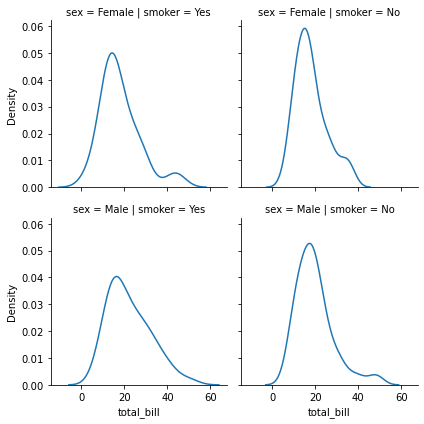

In [27]:
g = sns.FacetGrid(tip_data, col="smoker", row="sex")
g = g.map(sns.kdeplot, "total_bill")

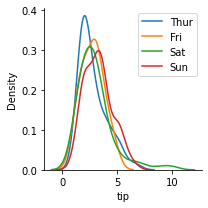

In [28]:
g = sns.FacetGrid(tip_data, hue="day", hue_order=["Thur", "Fri", "Sat", "Sun"])
g = g.map(sns.kdeplot, "tip")
plt.legend()

### Haremos un análisis bivariado de los datos numéricos

- Podemos observar que hay una relación positiva entre el total de la cuenta (total_bill) y las propinas (tip). 
  - A medida que incrementa la cuenta incrementa la propina.
  
- Podemos evaluar numéricamente esta relación con el coeficiente $R^2$.  
- El coeficiente $R^2$ puede ser definido como as $R^2 = \frac{\text{Variación explicada}}{\text{Variación total}}$, 
$R^{2}=1-{SS_{\rm {residuals}} \over SS_{\rm {total}}}$, 
donde $SS_{\text{residuals}}=\sum _{i}(y_{i}-\hat{y}_{i})^{2}$ es la diferencia entre el valor obsevado $y_{i}$ y el valor predicho por el modelo $\hat{y}_{i}$, 
y $SS_{\text{total}}=\sum _{i}(y_{i}-{\bar {y}})^{2}$, 
donde $\bar {y}$ es la media de los valores observados.
- $R^2$, 
indica la proporción de variabilidad en la variable dependiente que es explicada por la variable independiente en el modelo de regresión. 
- Un valor de $R^2 = 1$ indica una dependencia lineal perfecta. 

Text(10, 10, '$R^2=$0.6757')

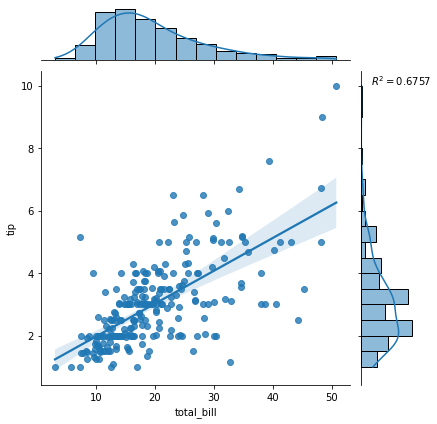

In [29]:
from scipy.stats import pearsonr

sns.jointplot(x="total_bill", y="tip", data=tip_data, kind="reg")

r2 = np.round(pearsonr(tip_data.total_bill, tip_data.tip)[0], 4)

plt.text(10,10,r'$R^2=$'+str(r2))

- Esta relación positiva también se observa entre el valor de la cuenta y el tamaño del grupo.

Text(1, 7, '$R^2=$0.5983')

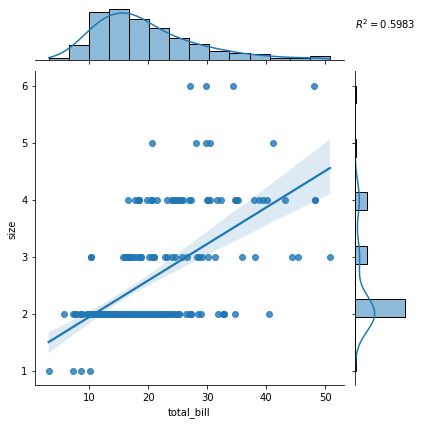

In [30]:
sns.jointplot(x="total_bill", y="size", data=tip_data, kind="reg")

r2 = np.round(pearsonr(tip_data['total_bill'], tip_data['size'])[0], 4)

plt.text(1,7,r'$R^2=$'+str(r2))

- Es más difícil seguir afirmando que existe esta relación positiva entre la cuenta total y la propina por persona. 

Text(1, 4, '$R^2=$0.241')

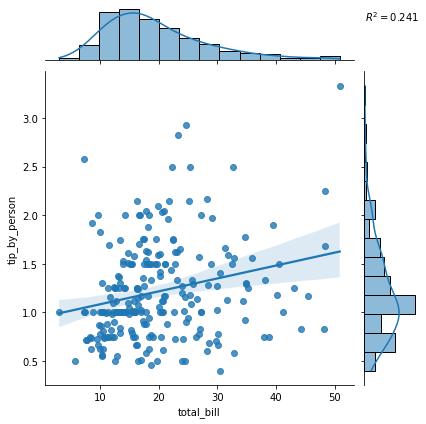

In [31]:
sns.jointplot(x="total_bill", y="tip_by_person", data=tip_data, kind="reg")

r2 = np.round(pearsonr(tip_data.total_bill, tip_data.tip_by_person)[0], 4)

plt.text(1,4,r'$R^2=$'+str(r2))

### Modelos lineales por género (sex)

- Analicemos los modelos por género (sex):
- Se puede apreciar una pendiente positiva más alta para la línea naranja (Male) que indica una inclinación más pronunciada en comparación con la línea azul (Female).
  - Esto indica que la variable $y$ crece más rápido respecto a $x$ en la línea naranja que en la línea azul.
  - Es decir los hombres dejan más propina que las mujeres respecto al total de la factura. 
  - Por supuesto esta diferencia es apenas notable, dado que la pendiente de las curvas son muy similares. 

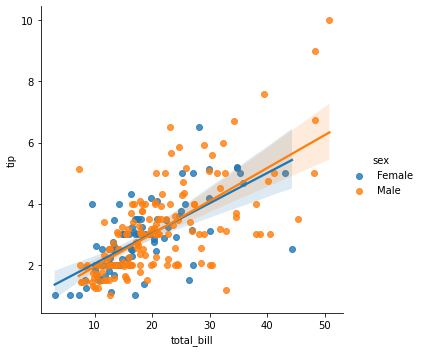

In [32]:
sns.lmplot(x='total_bill', y='tip', data=tip_data, hue='sex', fit_reg=True)

### Exportando los gráficos a archivos

- Es importante exportar los gráficos a archivos para usarlos en informes, presentaciones, etc.

  - A continuación haremos un ejercicio.
  - La sintaxis está comentada, puede profundizar revisando la documentación de seaborn.

- Haremos los gráficos de violín ahora personalizando algunas opciones de gráficos.

[None, None]

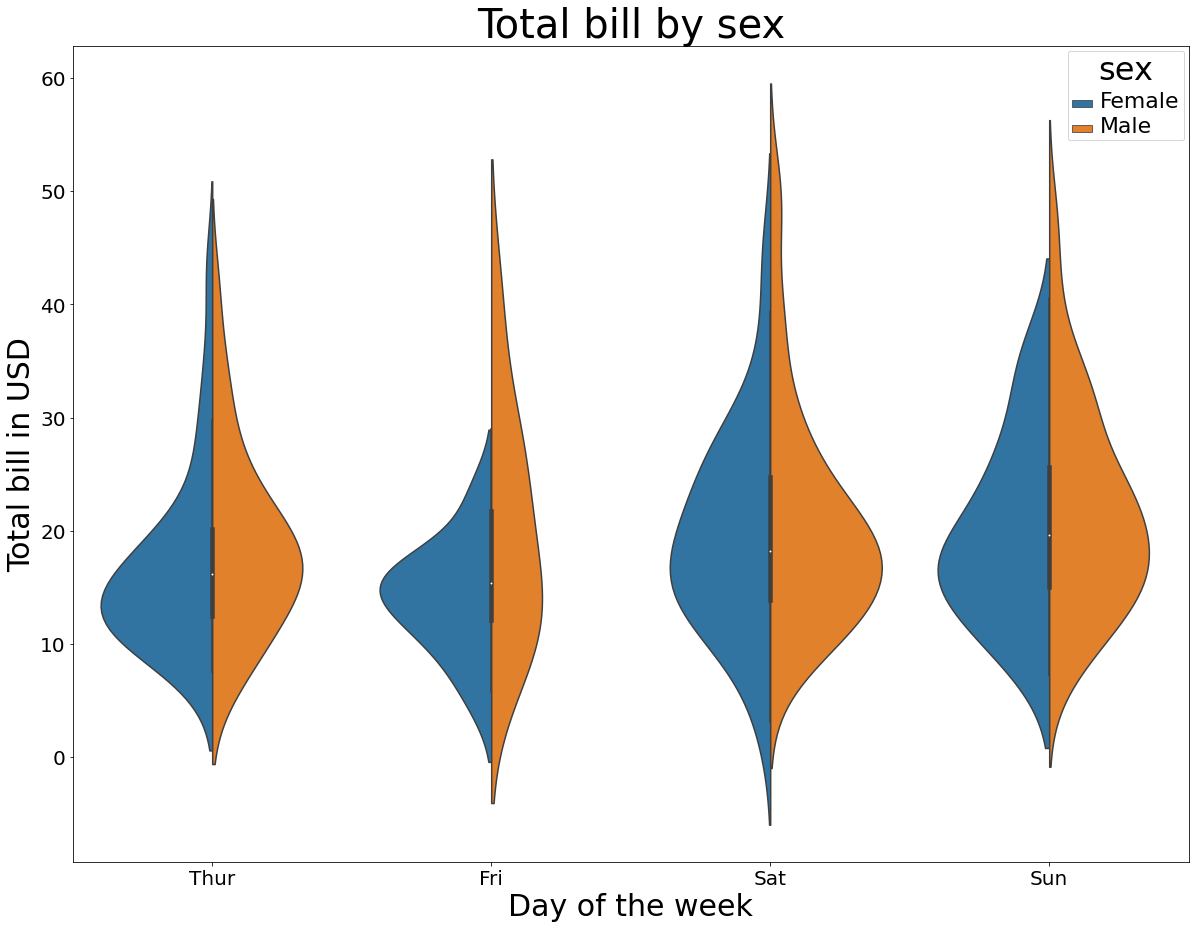

In [33]:
# Define figure size
plt.figure(figsize=(20,15))

# Save sns plot to g
g = sns.violinplot(x="day", y="total_bill", hue="sex", data=tip_data, 
               split=True, order=["Thur", "Fri", "Sat", "Sun"])

g.axes.set_title("Total bill by sex",fontsize=40)  # Define title label and size
g.set_xlabel("Day of the week",fontsize=30)  # Define xlabel and size
g.set_ylabel("Total bill in USD",fontsize=30)  # Define ylabel and size
g.tick_params(labelsize=20)  # Define tick size
plt.setp(g.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(g.get_legend().get_title(), fontsize='32') # for legend ti

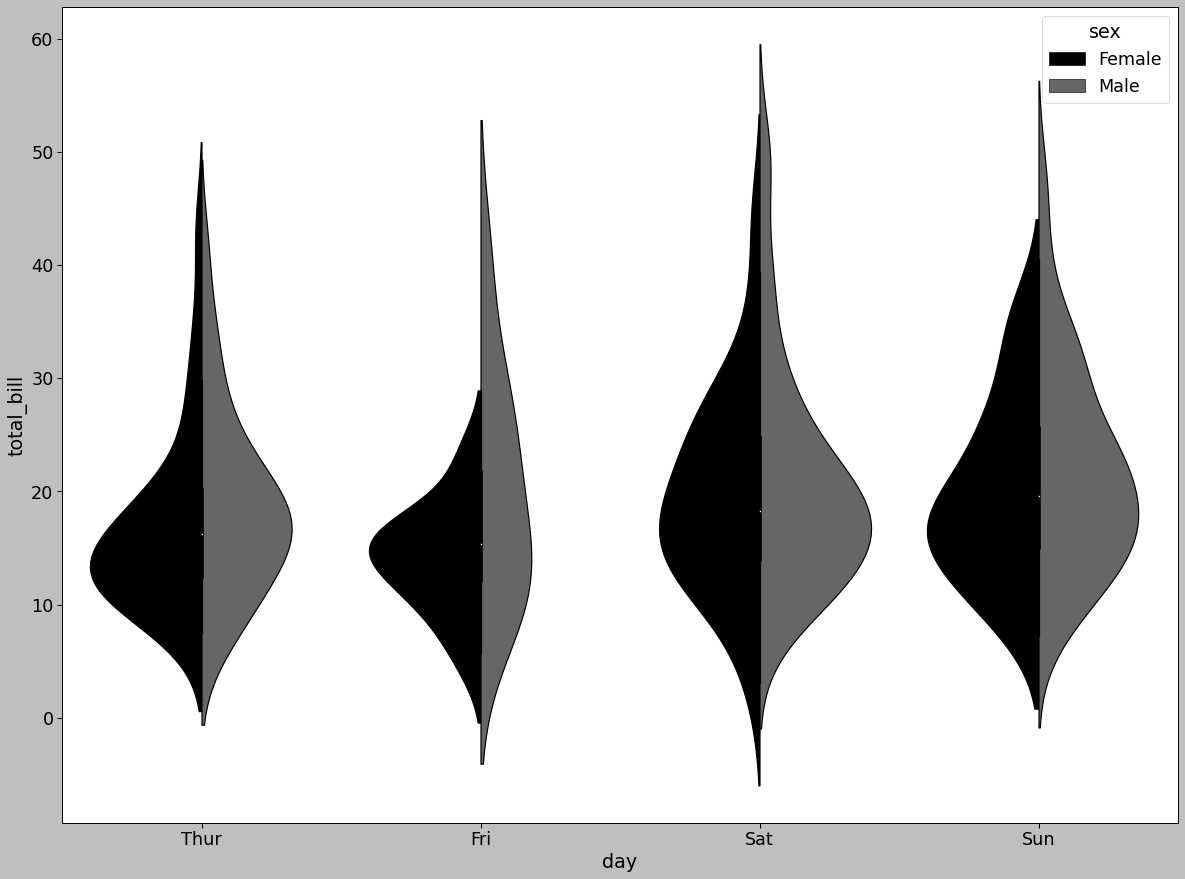

In [34]:
# Another way

# plt.style.use('ggplot')  # If you prefer ggplot aesthetics

"""
print(plt.style.available)
['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 
 'seaborn-whitegrid', 'classic', '_classic_test', 'seaborn-talk', 
 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 
 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 
 'seaborn', 'seaborn-paper', 'bmh', 'seaborn-white', 'dark_background', 
 'seaborn-poster', 'seaborn-deep']
"""

plt.style.use("grayscale")

plt.figure(figsize=(20,15))

sns.set_context("paper", font_scale=2)  # Set a scale for all fonts

sns.violinplot(x="day", y="total_bill", hue="sex", data=tip_data, 
               split=True, order=["Thur", "Fri", "Sat", "Sun"])

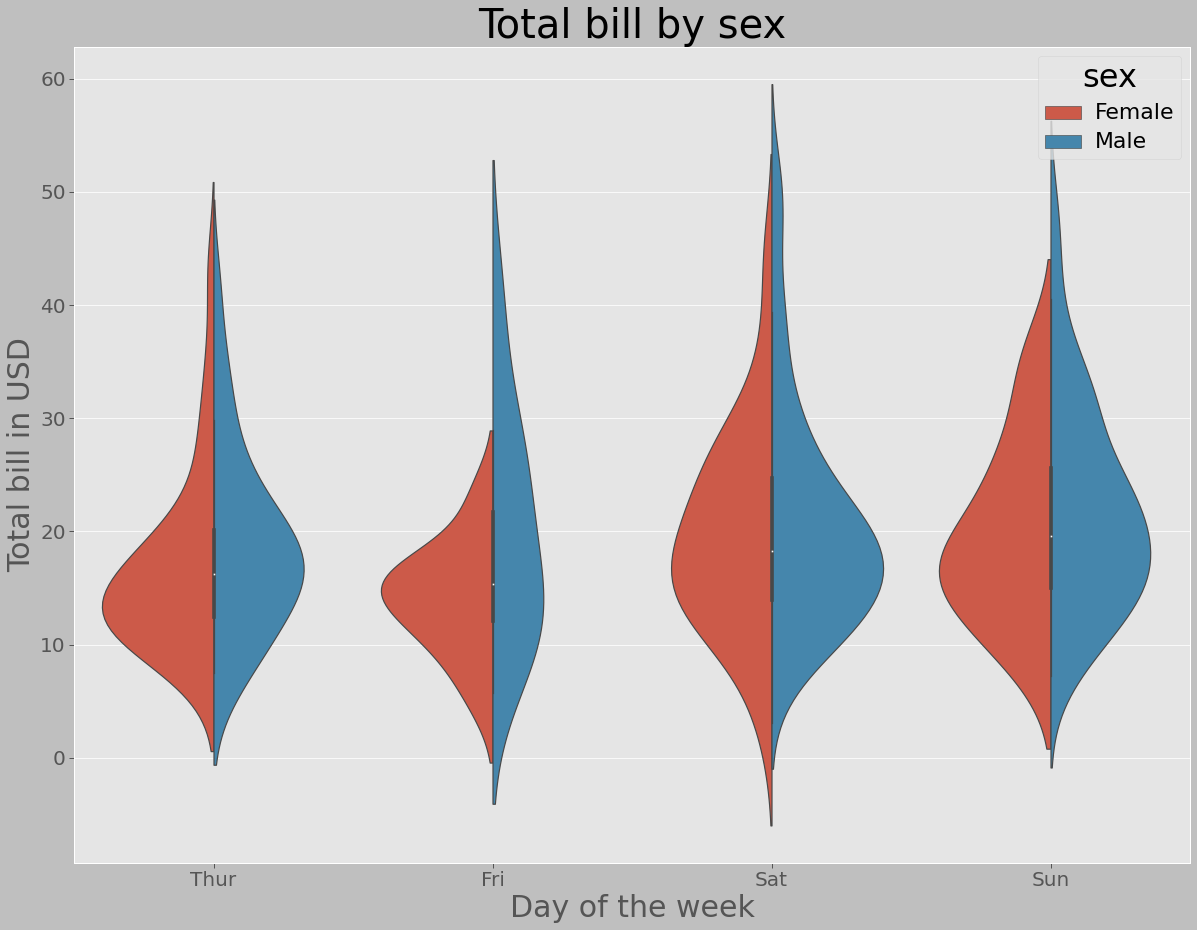

In [35]:
# Define figure size
plt.figure(figsize=(20,15))

plt.style.use('ggplot')

# Save sns plot to g
g = sns.violinplot(x="day", y="total_bill", hue="sex", data=tip_data, 
               split=True, order=["Thur", "Fri", "Sat", "Sun"])

g.axes.set_title("Total bill by sex",fontsize=40)  # Define title label and size
g.set_xlabel("Day of the week",fontsize=30)  # Define xlabel and size
g.set_ylabel("Total bill in USD",fontsize=30)  # Define ylabel and size
g.tick_params(labelsize=20)  # Define tick size
plt.setp(g.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(g.get_legend().get_title(), fontsize='32') # for legend ti

# Save figure to pdf file
# The file is generated in the folder where jupyter was started
plt.savefig("violin.pdf", format="pdf")

### Fuentes y recursos

- Gráficos con datos categóricos: https://seaborn.pydata.org/tutorial/categorical.html
- Libro online de ciencia de datos: https://livebook.datascienceheroes.com
- [Interprestar estadísticos y gráficos descriptivos](https://support.minitab.com/es-mx/minitab/18/help-and-how-to/statistics/basic-statistics/how-to/display-descriptive-statistics/interpret-the-results/all-statistics-and-graphs/)

### Ejemplos en kaggle

- https://www.kaggle.com/saduman/eda-and-data-visualization-with-seaborn
- https://www.kaggle.com/javierrubio/easy-seaborn-guide-for-eda
- https://www.kaggle.com/saurav9786/cardiogoodfitness-descriptive-statistics